<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from datetime import datetime

from helpers_image import show
from helpers_config import load_config, save_config
from unet import UNet

Using TensorFlow backend.


In [2]:
config = load_config()#path="../output/unet/config.json")
#dir_name = datetime.today().strftime("%Y%m%d_%H%M%S")
save_dir = config['dst_path'] + config['model_name'] + "/"

save_dir

'../output/unet2/'

In [3]:
pipeline = UNet(patch_size=config['patch_size'],
                data_dir=config['data_dir'],
                initial_epoch=config['initial_epoch'],
                tr_losses=config['tr_losses'],
                val_losses=config['val_losses'])

In [4]:
X_tr, Y, X_te = pipeline.load_data(sample_tr_img=config['sample_tr_img'],
                                   sample_te_img=config['sample_te_img'],
                                   stride=config['stride'],
                                   rotations=config['rotations'])

loading data...
data loaded


In [5]:
X_tr.shape, Y.shape, X_te.shape

((40000, 80, 80, 3), (40000, 80, 80, 1), (54450, 80, 80, 3))

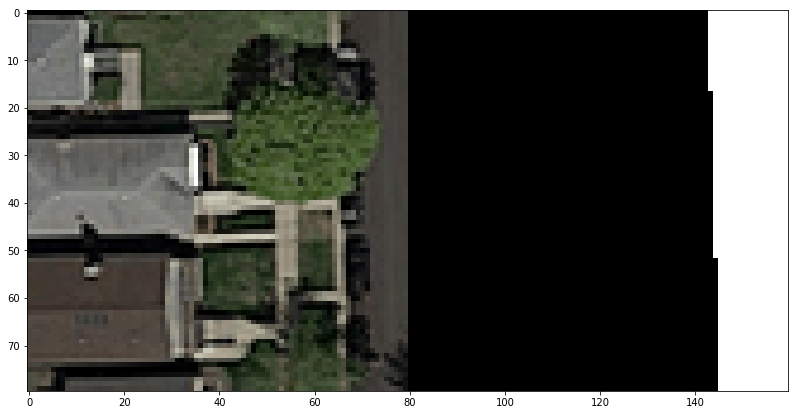

In [6]:
i = 28
show([X_tr[i], Y[i]])

In [8]:
pipeline.train_model(X_tr=X_tr[:32],
                     Y=Y[:32],
                     epochs=config['epochs'],
                     sample_img=config['sample_tr_img'],
                     batch_size=config['batch_size'],
                     verbose=config['verbose'],
                     validation_split=config['validation_split'],
                     shuffle=config['shuffle'],
                     load_checkpoint=config['load_checkpoint'],
                     checkpoint_path=save_dir,
                     save_best_only=config['save_best_only'])

loading model...


C:\Users\Greg\Programming\Python\ml2017\project02\src\unet.py:76: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4, up6], mode='concat', concat_axis=3)
C:\Users\Greg\Anaconda3\envs\py36\lib\site-packages\keras\legacy\layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\Greg\Programming\Python\ml2017\project02\src\unet.py:82: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3, up7], mode='concat', concat_axis=3)
C:\Users\Greg\Programming\Python\ml2017\project02\src\unet.py:88: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from 

model loaded
training model...
Train on 25 samples, validate on 7 samples
Epoch 1/10
Epoch 00001: val_loss improved from inf to 3.02926, saving model to ../output/unet2/weights.hdf5
25/25 [==============================] - 19s 774ms/step - loss: 0.6102 - acc: 0.8507 - val_loss: 3.0293 - val_acc: 0.8121
Epoch 2/10
Epoch 00002: val_loss did not improve
25/25 [==============================] - 16s 630ms/step - loss: 2.4070 - acc: 0.8507 - val_loss: 3.0293 - val_acc: 0.8121
Epoch 3/10
Epoch 00003: val_loss did not improve
25/25 [==============================] - 16s 626ms/step - loss: 2.4070 - acc: 0.8507 - val_loss: 3.0293 - val_acc: 0.8121
Epoch 4/10
Epoch 00004: val_loss did not improve
25/25 [==============================] - 16s 636ms/step - loss: 2.4070 - acc: 0.8507 - val_loss: 3.0293 - val_acc: 0.8121
Epoch 5/10
Epoch 00005: val_loss did not improve
25/25 [==============================] - 16s 633ms/step - loss: 2.4070 - acc: 0.8507 - val_loss: 3.0293 - val_acc: 0.8121
Epoch 6/10
E

In [10]:
pipeline.initial_epoch

10

In [11]:
pipeline.val_losses

[3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154,
 3.0292556285858154]

In [12]:
predictions = pipeline.predict(X_te=X_te[:10], sample_img=config['sample_te_img'])

10/10 [==============================] - 2s 189ms/step


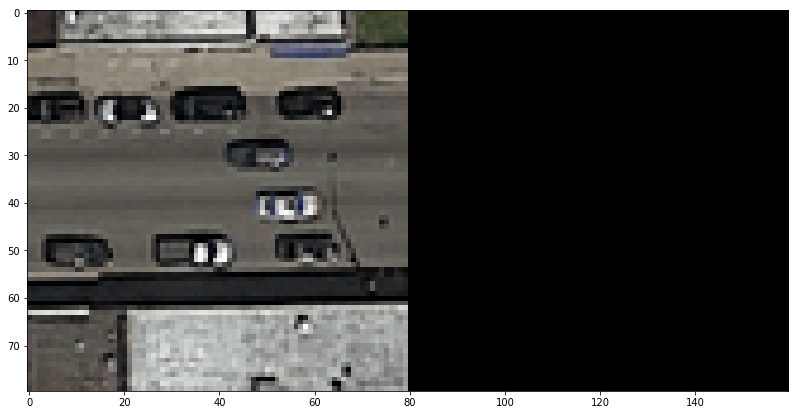

In [13]:
i = 0
show([X_te[i], predictions[i]])

In [14]:
Y_tr = pipeline.predict(X_tr[:10], sample_img=5)

10/10 [==============================] - 2s 185ms/step


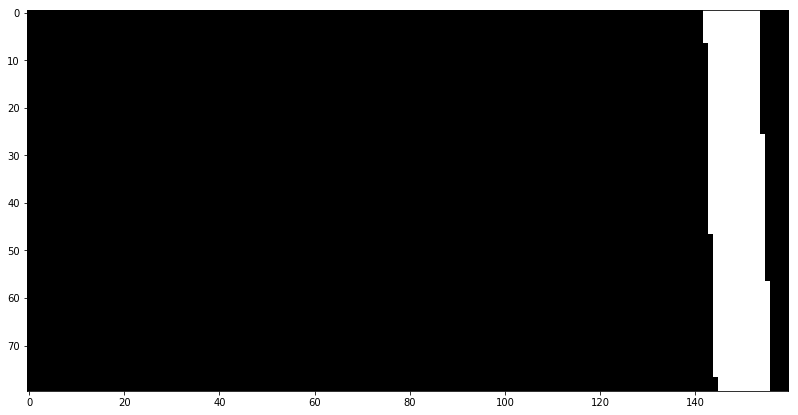

In [15]:
i = 0
show([Y_tr[i], Y[i]])

In [16]:
pipeline.save_output(predictions, save_dir, config.copy())